# Packed Stadiums, Better Scores? 
# Attendance vs Performance in Major League Soccer

In [2]:
import pandas as pd 
import numpy as np 
from fuzzywuzzy import process


## 1. Importing + Cleaning Data

In [40]:

matches_df = pd.read_csv("matches.csv",)
# matches_df.head()
matches_df = matches_df[["date", "year", "home", "away", "attendance", "home_score", "away_score"]]
matches_df = matches_df.dropna(subset=["attendance", "home_score", "away_score"])

#removing commas from attendence col & converting to int (prev str) 
matches_df['attendance'] = matches_df["attendance"].astype(str).str.replace(",", "").astype(int) 

matches_df["goal_differential"] = matches_df["home_score"] - matches_df["away_score"]
matches_df["home_win"] = (matches_df["home_score"] > matches_df["away_score"]).astype(int)

matches_df.head(20)

C:\Users\manas\AppData\Local\Temp\ipykernel_31356\4021388855.py:1: DtypeWarning: Columns (11,14,50,102,123,125,129,131,133,135,137,139,141,143,145,147,149,157,158,160,161,163,165,167,169,171,173,184,186,187,205,206) have mixed types. Specify dtype option on import or set low_memory=False.
  matches_df = pd.read_csv("matches.csv")


,date,year,home,away,attendance,home_score,away_score,goal_differential,home_win
0,7/31/1996,1996,New England,San Jose,12871,2,0,2,1
1,6/15/1996,1996,Dallas,Colorado,9704,1,1,0,0
2,8/29/1996,1996,Colorado,D.C. United,6368,1,2,-1,0
3,8/8/1996,1996,LA Galaxy,New England,10251,1,0,1,1
4,7/20/1996,1996,New England,D.C. United,18347,2,0,2,1
5,9/21/1996,1996,D.C. United,Colorado,20573,3,1,2,1
6,6/22/1996,1996,Tampa Bay,Columbus,8767,3,3,0,0
7,8/25/1996,1996,LA Galaxy,Dallas,19279,2,3,-1,0
8,7/28/1996,1996,D.C. United,Columbus,11173,2,0,2,1
9,6/26/1996,1996,MetroStars,KC Wiz,16103,2,0,2,1


## 2. Visualizing Data

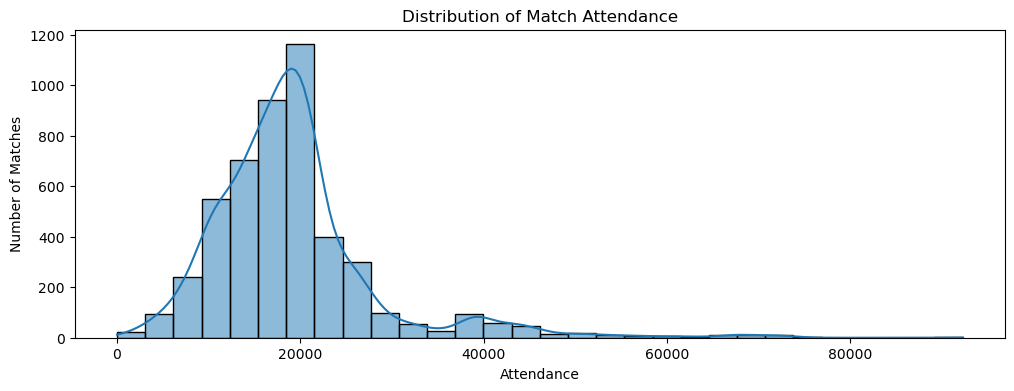

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
#plt.hist(matches_df["attendance"], bins=30 )
sns.histplot(matches_df["attendance"], bins=30, kde=True)
plt.title("Distribution of Match Attendance")
plt.xlabel("Attendance")
plt.ylabel("Number of Matches")
plt.show()


### Analysis: Attendance vs Home Win Rate
* *We began by exploring whether higher stadium attendance is associated with better outcomes for the home team in Major League Soccer matches.*
 
#### Distribution of Attendance
* *The histogram shows a right-skewed distribution, with most matches having attendance between 15,000 and 25,000.*
* *A small number of games had unusually high attendance (up to ~90,000), but these are rare outliers.*

## 3. Correlation Analysis On Data

In [50]:
correlation = matches_df[["attendance", "home_win"]].corr().iloc[0, 1]
correlation

0.034751402069712216

### Correlation Analysis - Interpretation

#### correlation ≈ 0.035

*We computed the Pearson correlation coefficient between attendance and home_win (1 = win, 0 = not win)*

* *The correlation is positive but very weak.*

* *This suggests that while higher attendance might slightly increase the chance of a home team winning, the effect is minimal and not practically meaningful on its own.*

* *The weak signal could be due to confounding factors like team strength, opponent quality, or match importance none of which were controlled for in this exploratory analysis*

## 4. Binned Analysis On Data

C:\Users\manas\AppData\Local\Temp\ipykernel_31356\820482800.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  matches_df.groupby("attendance_bin")["home_win"]


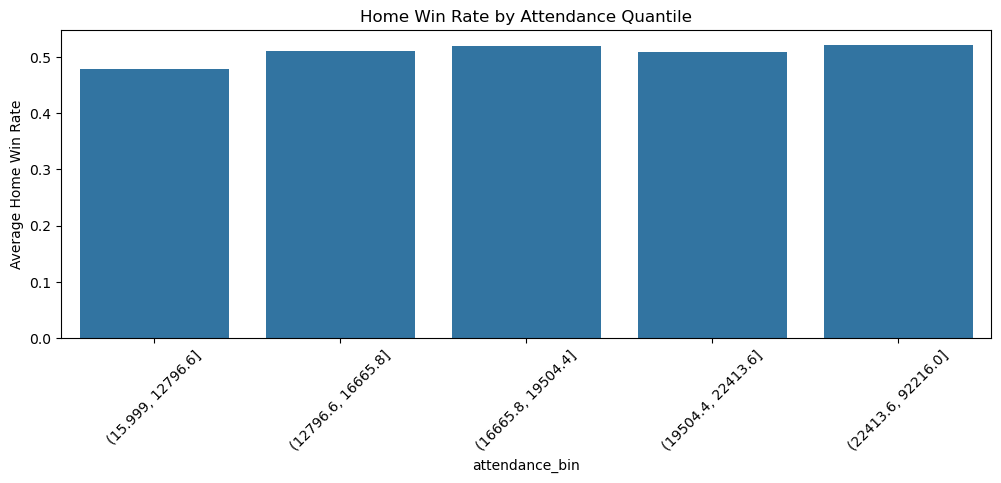

In [98]:
matches_df["attendance_bin"] = pd.qcut(matches_df["attendance"], q=5)

attendance_win_rates = (
    matches_df.groupby("attendance_bin")["home_win"]
    .mean()
    .reset_index()
    .rename(columns={"home_win": "avg_home_win_rate"})
)

plt.figure(figsize=(12, 4))
sns.barplot(data=attendance_win_rates, x="attendance_bin", y="avg_home_win_rate")
plt.title("Home Win Rate by Attendance Quantile")
plt.ylabel("Average Home Win Rate")
plt.xticks(rotation=45)
plt.show()





###  Binned Analysis: Home Win Rate by Attendance Quantile

*we divided all matches into five quantiles (equal-sized bins) based on attendance.*

*Each bin contains approximately 20% of the matches, sorted by attendance levels.*

#### Result:

* There is a **gradual upward trend** in home win rate as attendance increases.
* Matches in the **lowest attendance bin (~16,000 and below)** had the **lowest home win rate (~47%)**
* Matches in the **highest attendance bin (~22,000 and above)** had the **highest win rate (~52%)**

---

####  Interpretation:

*The change in win rate across bins is modest (~5% increase from lowest to highest), the trend suggests that larger crowds may contribute positively to home team performance.*

  *This reinforces the possibility that crowd size could have a **small but meaningful psychological or environmental impact** on match outcomes.*
  
  *However, these results are observational**, and other factors (e.g., team strength, venue capacity, rivalry games) may be influencing both attendance and outcomes.*



## 5. Linear Regression
### By how many goals does the home team win or lose?

Intercept: 0.4059
Slope (per extra attendee): 0.000007


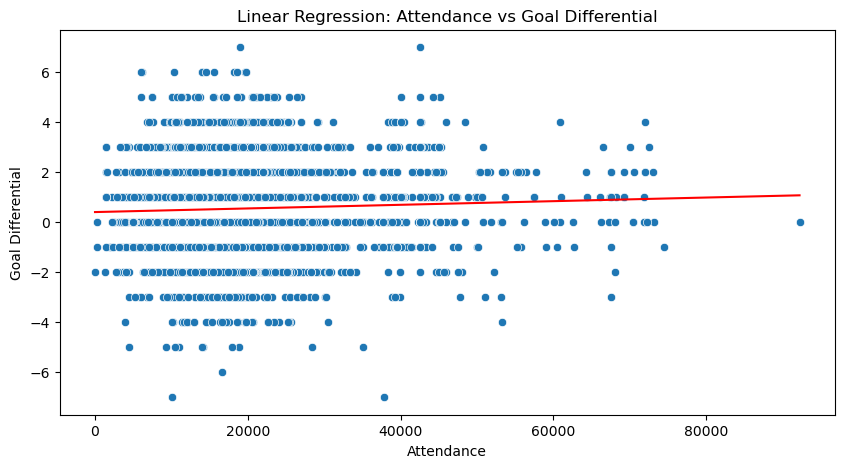

In [91]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
import seaborn as sns

X = matches_df[["attendance"]]
y = matches_df["goal_differential"]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f"Intercept: {lin_reg.intercept_:.4f}")
print(f"Slope (per extra attendee): {lin_reg.coef_[0]:.6f}")

plt.figure(figsize=(10, 5))
sns.scatterplot(x="attendance", y="goal_differential", data=matches_df)
sns.lineplot(x= matches_df["attendance"], y= lin_reg.predict(X), color="red")
plt.title("Linear Regression: Attendance vs Goal Differential")
plt.xlabel("Attendance")
plt.ylabel("Goal Differential")
plt.show()
 


###  Linear Regression: Attendance vs Goal Differential

*To assess whether higher match attendance influences **how many goals the home team wins (or loses) by**, we ran a **simple linear regression** with:*

* ***X (independent variable)**: `attendance`*
* ***y (dependent variable)**: `goal_differential` (home goals - away goals)*

---

###  Model Results:

* ***Intercept**: 0.4059*
* ***Slope**: 0.000007*

This means:

> *For every additional person in the crowd, the expected goal differential increases by **0.000007 goals***

*In practical terms*

* *A jump of **10,000 more spectators** would increase expected home goal differential by just **0.07 goals***
* *This is a **very small effect size**, indicating a weak linear relationship*

---

### Visualization:

* *The **scatterplot** shows that most goal differentials cluster around 0–2 regardless of attendance.*
* *The **regression line** is nearly flat reinforcing the weak association.*
* *There's no clear trend suggesting that bigger crowds reliably lead to bigger winning margins.*

---

